<a href="https://colab.research.google.com/github/kmkarakaya/ML_tutorials/blob/master/Text_Generation_Fundementals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Generation in Deep Learning with Tensorflow & Keras: Fundamentals 

This tutorial is the first part of the "**Text Generation in Deep Learning**" series.

We will cover all the  topics related to Text Generation with sample implementations in **Python Tensorflow Keras**.

In this part, we will learn the **Fundamentals  of Text Generation** in Deep Learning.

If you would like to learn more about **Deep Learning** with practical coding examples, please subscribe to [Murat Karakaya Akademi YouTube Channel](https://www.youtube.com/channel/UCrCxCxTFL2ytaDrDYrN4_eA)  or follow [my blog on Medium](https://medium.com/@kmkarakaya). 

Do not forget to turn on **Notifications** so that you will be notified when new parts are uploaded.

You can access this **Colab Notebook** using the link given in the video description below.

## Text Generation in Deep Learning with Tensorflow & Keras 

**Part A**: Fundamentals 

**Part B**: Tensorflow Data Pipeline for Character Level Text Generation

**Part C**: Tensorflow Data Pipeline for Word Level Text Generation

**Part D**: Recurrent Neural Notework (LSTM) Model for Character Level Text Generation

**Part E**: Encoder-Decoder Model for Character Level Text Generation

**Part F**: Recurrent Neural Netework (LSTM) Model for Word Level Text Generation

**Part G**: Encoder-Decoder Model for Word Level Text Generation


You can **watch** all these parts on [Murat Karakaya Akademi channel on YouTube](https://www.youtube.com/channel/UCrCxCxTFL2ytaDrDYrN4_eA) in **[ENGLISH](https://youtube.com/playlist?list=PLQflnv_s49v9QOres0xwKyu21Ai-Gi3Eu)** or **[TURKISH](https://youtube.com/playlist?list=PLQflnv_s49v-oEYNgoqK5e4GyUbodfET3)**


You can access the **Python Keras codes** in the video description of each part.

[Links to all parts on **Medium** are here.](https://kmkarakaya.medium.com/text-generation-in-deep-learning-with-tensorflow-keras-f7cfd8d65d9e)

## References

[Character-level text generation with LSTM](https://keras.io/examples/generative/lstm_character_level_text_generation/)

[Toward Controlled Generation of Text](https://arxiv.org/abs/1703.00955)

[Attention Is All You Need](https://arxiv.org/abs/1706.03762)

[Talk to Transformer](https://app.inferkit.com/demo)

[What is the difference between word-based and char-based text generation RNNs?](https://datascience.stackexchange.com/questions/13138/what-is-the-difference-between-word-based-and-char-based-text-generation-rnns)

[The survey: Text generation models in deep learning](https://www.sciencedirect.com/science/article/pii/S1319157820303360)

[Generative Adversarial Networks for Text Generation](https://becominghuman.ai/generative-adversarial-networks-for-text-generation-part-1-2b886c8cab10)

[FGGAN: Feature-Guiding Generative Adversarial Networks for Text Generation](https://ieeexplore.ieee.org/abstract/document/9091179)

[How to sample from language models](https://towardsdatascience.com/how-to-sample-from-language-models-682bceb97277)

[How to generate text: using different decoding methods for language generation with Transformers](https://huggingface.co/blog/how-to-generate)

[Hierarchical Neural Story Generation](https://arxiv.org/abs/1805.04833)

In [5]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="400" height="300" src="https://www.youtube.com/embed/Ait1_xNmxII?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


# What is Text Generation?

Text generation is a subfield of **natural language processing (NLP)**. It leverages knowledge in computational linguistics and artificial intelligence to ***automatically generate natural language texts***, which can satisfy certain communicative requirements.



You can find [a demo on this link](https://app.inferkit.com/demo).

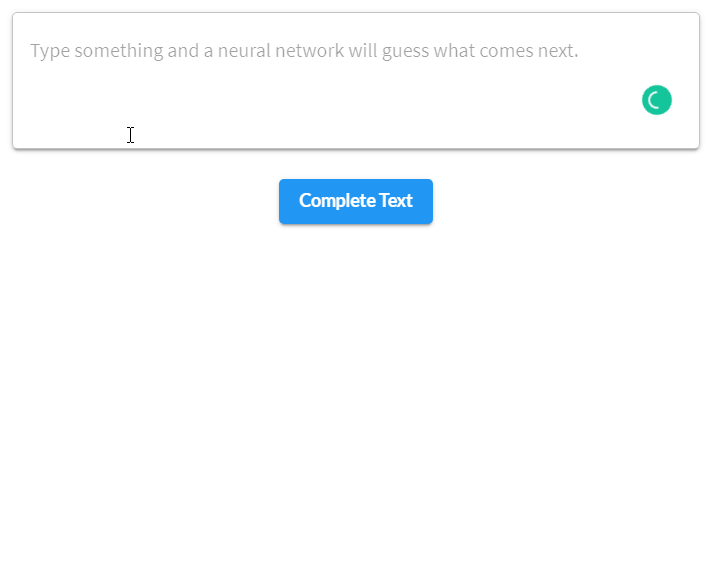

## How it works?
In general: 
* We first **train**  a ***Language Model*** (LM) with  a ***corpus***. LM **learns** the ***conditional probability distribution*** of the next token for a given token sequence from the corpus.






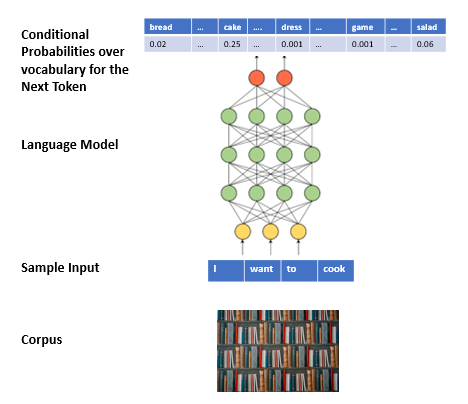

* In **text generation**, LM works in a loop:
  * We provide initial  text (seed) to LM. 
  * LM **calculates** the **conditional probabilities** of the vocabulary items for the next token. 
  * We **sample** the next token using this conditional probability distribution.
  * We **concatenate** this token to the seed and provide this sequence as the new seed to LM

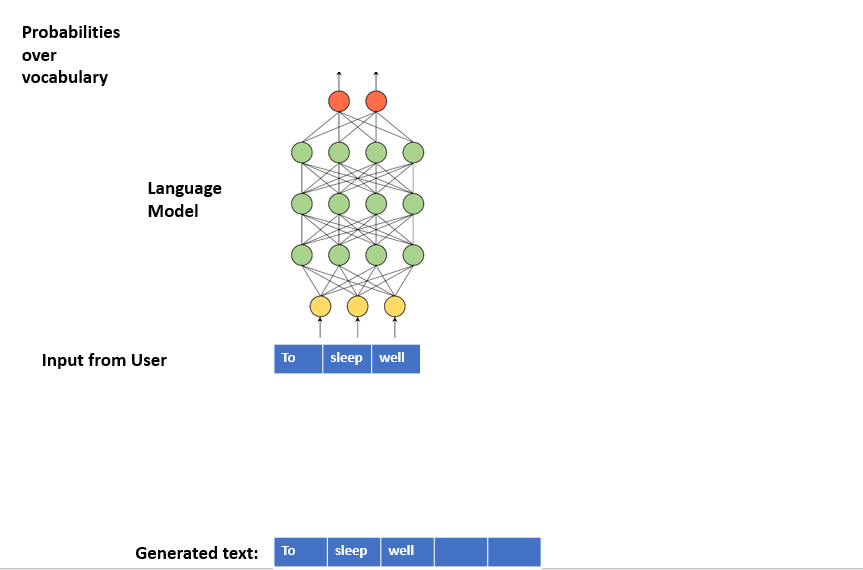

# Terminology

## Text Corpus

A corpus (plural ***corpora***) or text corpus is a **language resource** consisting of a ***large and structured set of texts***. 

For example, [the Amazon Review corpus](https://www.kaggle.com/bittlingmayer/amazonreviews) consists of **a few million** Amazon customer reviews (input text) and star ratings (output labels) for learning how to train a Language Model for sentiment analysis. 

## Language Model

A statistical language model is a **probability distribution** over sequences of words. 

## Sampling
**Sampling** means randomly **picking** the next word according to its *conditional probability distribution*.
After generating a probability distribution over vocabulary for the given input sequence, we need to  carefully decide how to **select the next token** (***sample***) from this distribution. 



There are **several methods for sampling** in text generation (see [here](https://towardsdatascience.com/how-to-sample-from-language-models-682bceb97277) and [here](https://huggingface.co/blog/how-to-generate)):


* **Greedy Search**: Greedy search simply selects the word with the highest probability as its next word. However, if we always sample the  most likely word, the standard language model training objective causes us to **get stuck in loops** like “*I don’t know. I don’t know. I don’t know.*”

* **Beam Search**: Beam search reduces the risk of missing hidden high probability word sequences by keeping the most likely num_beams of hypotheses at each time step and eventually choosing the hypothesis that has the overall highest probability. For details check [this blog](https://huggingface.co/blog/how-to-generate).

  **Beam search** will always find an output sequence with **higher** probability than **greedy search**, but is not guaranteed to find the most likely output.






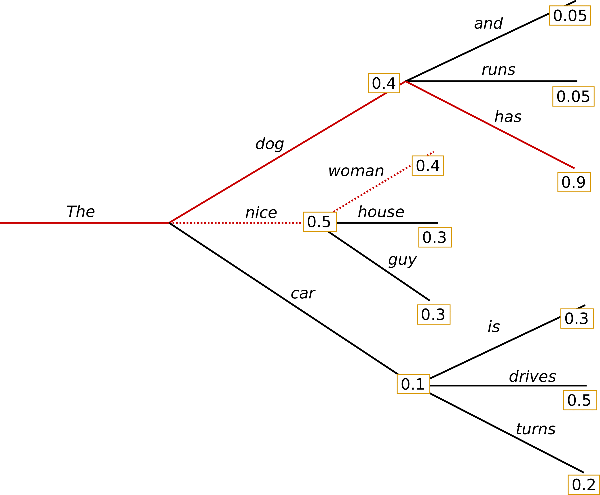



* **Temperature Sampling**: Temperature sampling is inspired by statistical thermodynamics, where ***high temperature*** means low energy states are more likely encountered. In probability models, **logits** play the role of energy and we can implement temperature sampling by **dividing logits by the temperature** before feeding them into ***softmax*** and obtaining our sampling probabilities.

  Below is an implementation for Temperature Sampling [taken from here](https://keras.io/examples/generative/lstm_character_level_text_generation/)

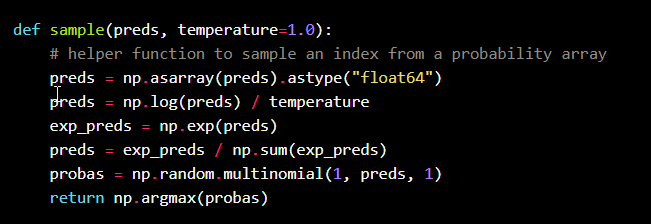

* **Top-K Sampling**: [Fan et. al (2018)](https://arxiv.org/abs/1805.04833) introduced a simple, but very powerful sampling scheme, called Top-K sampling. In Top-K sampling, the **K most likely next words** are filtered and the probability mass is redistributed among only those K next words. **GPT2** adopted this sampling scheme, which was one of the reasons for its success in **story generation**.

## Character Level Text Generation
A Language Model can be trained to generate text **character-by-character**. In this case, each of the **input** and **output** tokens is a **character**. Moreover, Language Model outputs **a conditional probability distribution** over **character set**.




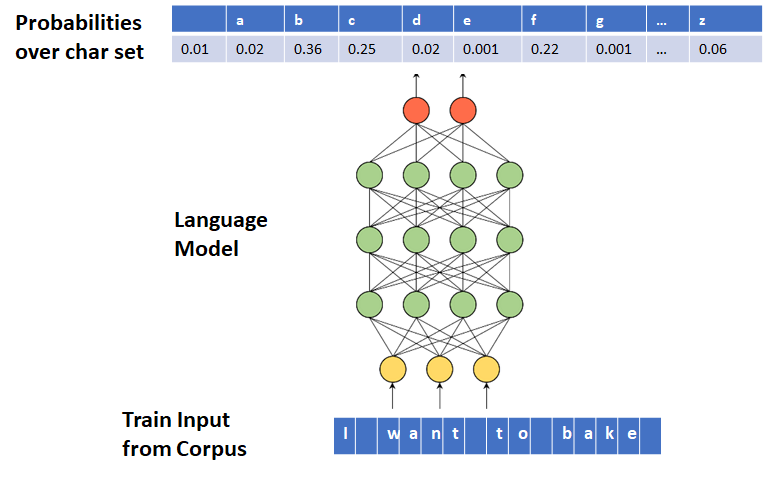

## Word Level Text Generation

A Language Model can be trained to generate text **word-by-word**. In this case, each of the **input** and **output** tokens is a **word**. Moreover, Language Model outputs a **conditional probability distribution** over **vocabulary**.

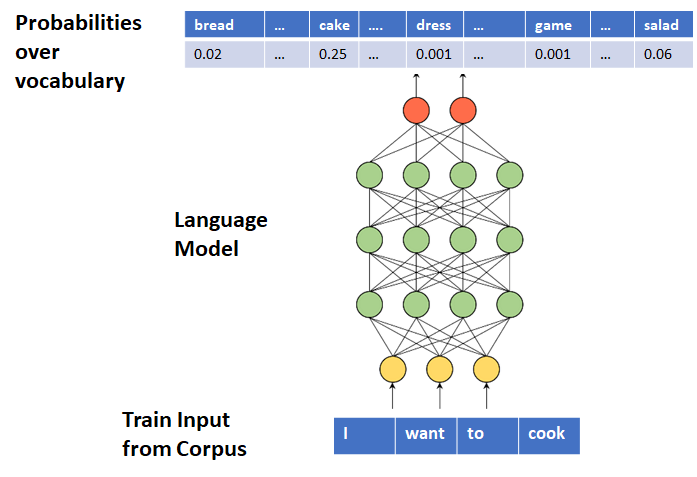

# Which one to use?

In general, 
* **character level** LMs can mimic grammatically correct sequences for a wide range of languages, require bigger hidden layer and computationally more expensive
* **word level** LMs train faster and generate more coherent texts and yet even these generated texts are far from making actual sense. 

Main advantage of character level over word level  Text Generation models:
*  **Character level models** have a really **small vocabulary**. For example, the GBW dataset will contain approximately **800 characters** compared to **800,000 words**. 
* In practice, this means that **Character level models** will require **less memory** and have **faster inference** than their word counterparts. 
* **Character level models** **do not require tokenization** as a preprocessing step. 
* However, **Character level models** require a much **bigger hidden layer** to successfully model ***long-term dependencies*** which means higher computational costs.


In summary, you need to work on both to understand their advantages and disadvantages.

[More discussion is here](https://datascience.stackexchange.com/questions/13138/what-is-the-difference-between-word-based-and-char-based-text-generation-rnns)

# What kinds of Language Models in Artificial Neural Networks exist?




## Recurrent Neural Networks:
[As discussed in here](https://www.sciencedirect.com/science/article/pii/S1319157820303360):

  * Recurrent Neural Networks (RNNs) are the **most powerful** algorithm for NL problems specifically when modeling the sequential data. 
  
  * Since RNNs contain **internal memory** due to which it is able to remember the previous input as well as current input that makes sequence modeling tasks a lot easier. 
  * The **output** at any time step does not only **depend on** current input but also on the ***output generated at previous time steps***, which makes it highly capable of tasks like language generation."


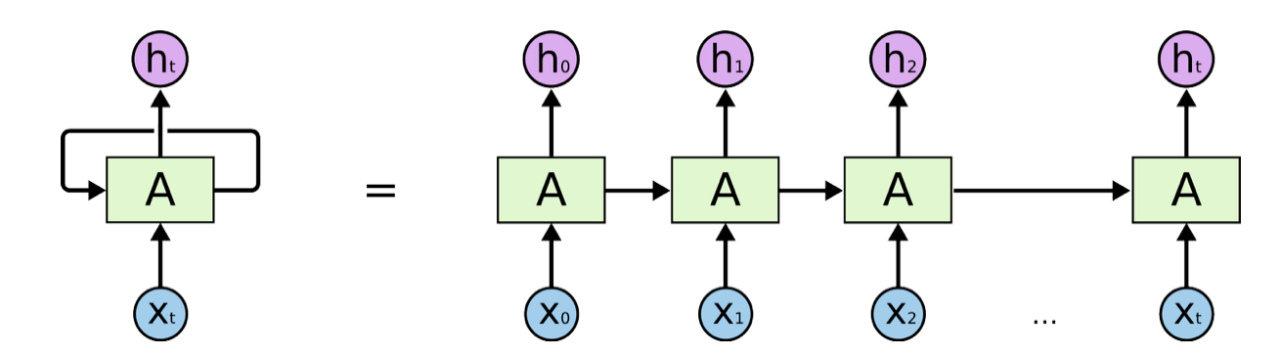

## Encoder-Decoder Models:

* Encoder-decoder models, also referred to as **sequence-to-sequence** models, were developed for ***machine translation*** and have rapidly exceeded the performance of prior systems despite having comparatively simple architectures, trained end-to-end to map source directly to target.

* In Encoder and Decoder parts, we can use RNN or CNN blocks.



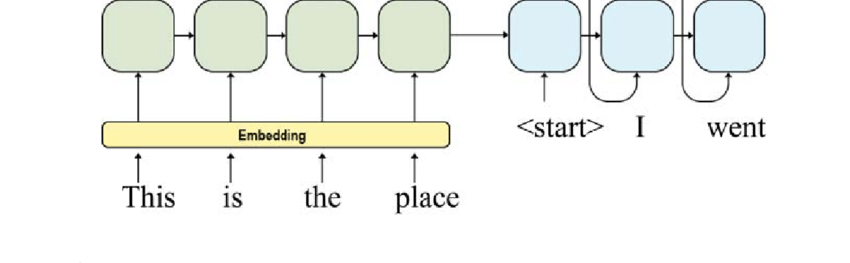

## Transformers

The paper ‘[Attention Is All You Need](https://arxiv.org/abs/1706.03762)’ introduces a novel architecture called Transformer. As the title indicates, it uses the attention mechanism. *Like RNN or Encoder-Decoder models*, **Transformer** is an architecture for transforming one sequence into another one with the help of **two parts** (Encoder and Decoder), but it differs from the previously described/existing sequence-to-sequence models because it **does not require any Recurrent Networks** (GRU, LSTM, etc.).


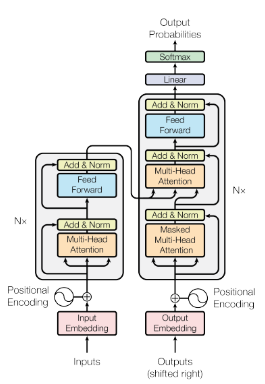

## Generative Adversarial Networks (GANs)

[As summarized here](https://becominghuman.ai/generative-adversarial-networks-for-text-generation-part-1-2b886c8cab10):
* A Generative Adversarial Networks (GANs) is a generator network that is trained to produce **realistic** samples by introducing an ***adversary*** i.e. the ***discriminator*** network, whose job is to detect if a given sample is “real” or “fake”. 

* Both, the **generator** and **discriminator** continuously improve until an equilibrium point is reached:
  * The **generator** improves as it receives feedback as to how well its generated samples managed to *fool* the **discriminator**.
  * The **discriminator** improves by being shown not only the *“fake”* samples generated by the **generator**, but also *“real”* samples drawn from a real-life distribution. 

  * This way, **discriminator** learns what generated samples look like and what real samples look like, thus enabling it to give **better feedback** to the **generator**.

Below, you see [a GAN model from this study](https://ieeexplore.ieee.org/abstract/document/9091179):

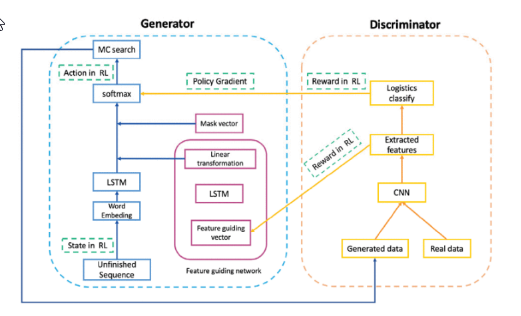

## Which ANN Language Model to use?

The LMs mentioned above have their advantages and disadvantages.

In a very short and simple comparision:
* Transformers are the novel models but they require much more data to be trained with.

* RNNs can not create coherent long sequences

* Encoder-Decoder models enhanced with Attention Mechanism could perform better than RNNs but worse than Transformers

* GANs can not be easily trained or converge.

As a researcher or developer, we need to know how to apply all these three approaches on text generation problem.



# Text Generation Types

## Random

LM is free to generate any text without being limited or directed by any specific rule.
 
We only expect realistic, coherent, understandable content to be generated. 


## Controllable 

**Controllable text generation** is the task of generating natural sentences whose **attributes** can be controlled. 

For example, [in this work](https://arxiv.org/abs/1703.00955),  you can **control** the **tense** (present or past) and **attitude** (positive or negative) of the generated text like below 

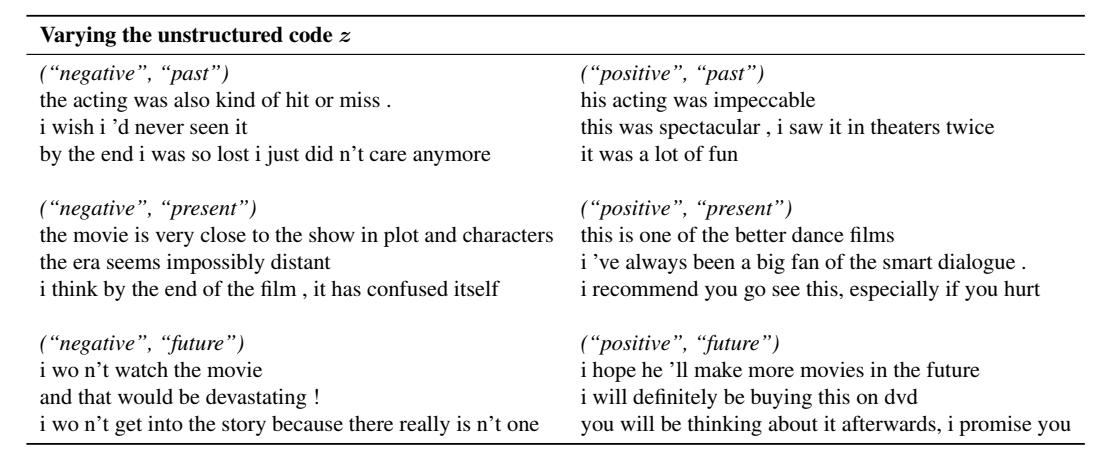

# Conclusion

We have reviewed the important concepts and methods related to Text Generation in Deep Learning.

You might need to check the references for more details.

**In the upcoming parts, we will implement the above concepts and methods by using Python, Tensorflow, and Keras.**

Thus, if you want to learn how to** develop a Text Generator**, please continue with the next parts.


# Comments or Questions?

Please **share your Comments or Questions**.

Thank you in advance.

Do not forget to check out the next parts!

Take care!